# Visualize the Multi-cell Whitenoise and Natural Scenes Models  

#### Using the new visualization toolbox of deep-retina

In [1]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import tableprint
import pyret.filtertools as ft
import pyret.visualizations as pyviz
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GT 750M (CNMeM is disabled)


In [2]:
# deep retina imports
import visualizations as viz
from preprocessing import datagen, loadexpt
from modeltools import load_model, load_partial_model, list_layers, get_performance, get_weights

## Paths to model architecture and weights

In [3]:
# model trained on white noise
natural_model_path = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-12-13 00.27.52 convnet/')
natural_weight_name = 'epoch098_iter07000_weights.h5'

# model trained on natural scenes
white_model_path = expanduser('~/Dropbox/deep-retina/saved/lenna.nirum/2015-12-13 23.20.03 convnet/')
white_weight_name = 'epoch097_iter06950_weights.h5'

## Load Keras Models

In [4]:
natural_multimodel = load_model(natural_model_path, natural_weight_name)
white_multimodel = load_model(white_model_path, white_weight_name)

## Get held-out performance (correlation coefficients) for all cells

In [10]:
white_white_performance = get_performance(white_multimodel, stim_type='white', cells=[0,1,2,3,4])
natural_white_performance = get_performance(natural_multimodel, stim_type='white', cells=[0,1,2,3,4])
white_natural_performance = get_performance(white_multimodel, stim_type='natural', cells=[0,1,2,3,4])
natural_natural_performance = get_performance(natural_multimodel, stim_type='natural', cells=[0,1,2,3,4])

Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.
Loading testing data... Done.


In [24]:
print(tableprint.hr(5))
print(tableprint.header(['cell 0', 'cell 1', 'cell 2', 'cell 3', 'cell 4']))
print(tableprint.hr(5))
print(tableprint.row(white_white_performance))
print(tableprint.row(natural_white_performance))
print(tableprint.row(white_natural_performance))
print(tableprint.row(natural_natural_performance))
print(tableprint.hr(5))

+-----------+------------+------------+------------+-----------+
|cell 0     | cell 1     | cell 2     | cell 3     | cell 4    |
+-----------+------------+------------+------------+-----------+
|   0.71308 |    0.59542 |    0.59751 |    0.75943 |    0.65742|
|   0.42341 |    0.21536 |     0.2643 |    0.41659 |    0.18955|
|   0.37797 |    0.21918 |    0.29797 |    0.34462 |    0.23577|
|    0.5549 |    0.40883 |    0.44862 |    0.51509 |     0.5675|
+-----------+------------+------------+------------+-----------+


## Visualize learned weights of white noise model

### List all the layers of the model, with whatever parameters they have

In [28]:
list_layers(natural_model_path, natural_weight_name)

+-----------+------------+-----------+
|layer      | weights    | biases    |
+-----------+------------+-----------+
|   layer_0 |    param_0 |    param_1|
|   layer_1 |            |           |
|   layer_2 |            |           |
|   layer_3 |            |           |
|   layer_4 |    param_0 |    param_1|
|   layer_5 |            |           |
|   layer_6 |    param_0 |    param_1|
+-----------+------------+-----------+


### Conv Layer ('layer_0')  
You can pass the path or a numpy array of the weights

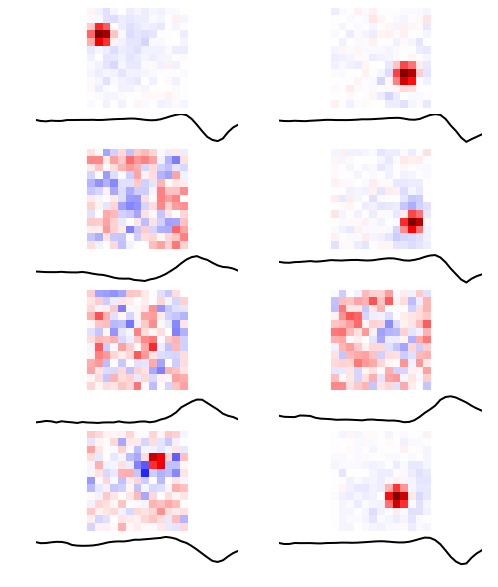

In [27]:
viz.visualize_convnet_weights(white_model_path + white_weight_name, normalize=True)

#### Are these filters low rank?

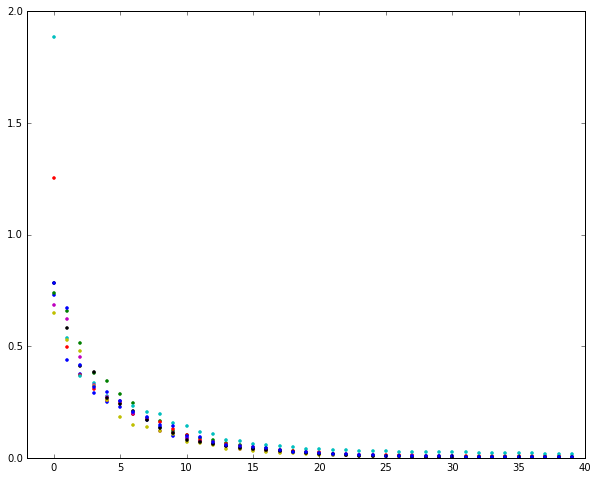

In [35]:
conv_filters = get_weights(natural_model_path + natural_weight_name, layer_name='layer_0')
for f in conv_filters:
    plt.plot(viz.singular_values(f), '.')
    plt.xlim([-2, 40])

### Affine layer ('layer 4')

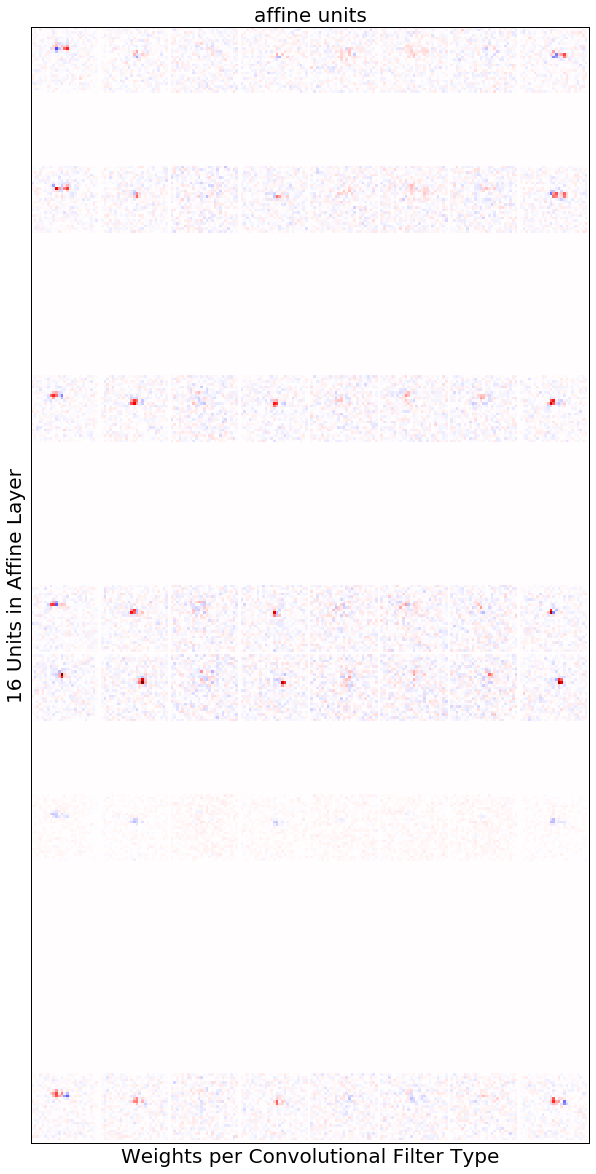

In [29]:
viz.visualize_affine_weights(white_model_path + white_weight_name, 8, fig_size=(20,20), layer_name='layer_4')

#### What are the STAs of these affine inter-units?

In [5]:
sta = viz.get_sta(white_multimodel, 4)

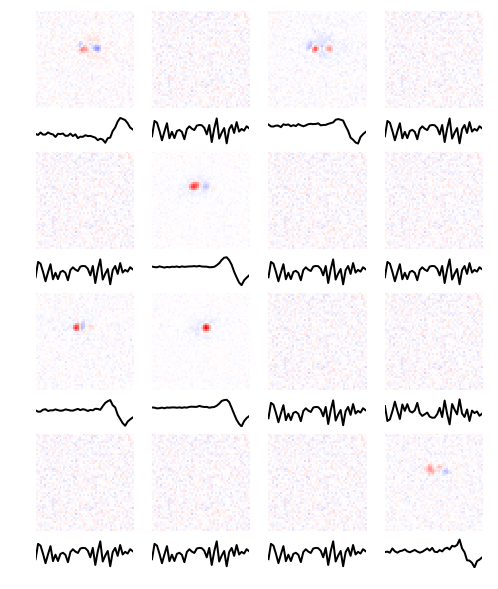

In [8]:
viz.visualize_sta(sta, normalize=True)

## Visualize natural scenes model

In [9]:
list_layers(natural_model_path, natural_weight_name)

+-----------+------------+-----------+
|layer      | weights    | biases    |
+-----------+------------+-----------+
|   layer_0 |    param_0 |    param_1|
|   layer_1 |            |           |
|   layer_2 |            |           |
|   layer_3 |            |           |
|   layer_4 |    param_0 |    param_1|
|   layer_5 |            |           |
|   layer_6 |    param_0 |    param_1|
+-----------+------------+-----------+


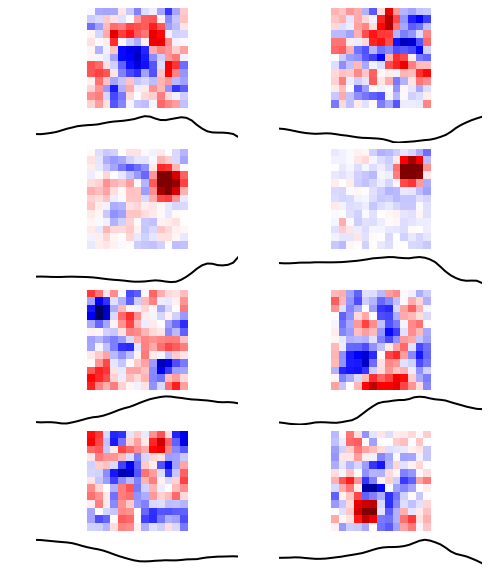

In [11]:
# you can just call viz.visualize_convnet_weights on the model path, but here I'll call it using the array of weights
# for demonstration purposes
natural_weights = get_weights(natural_model_path + natural_weight_name, layer_name='layer_0')
viz.visualize_convnet_weights(natural_weights, fig_size=(8,10), normalize=True)

### Affine units

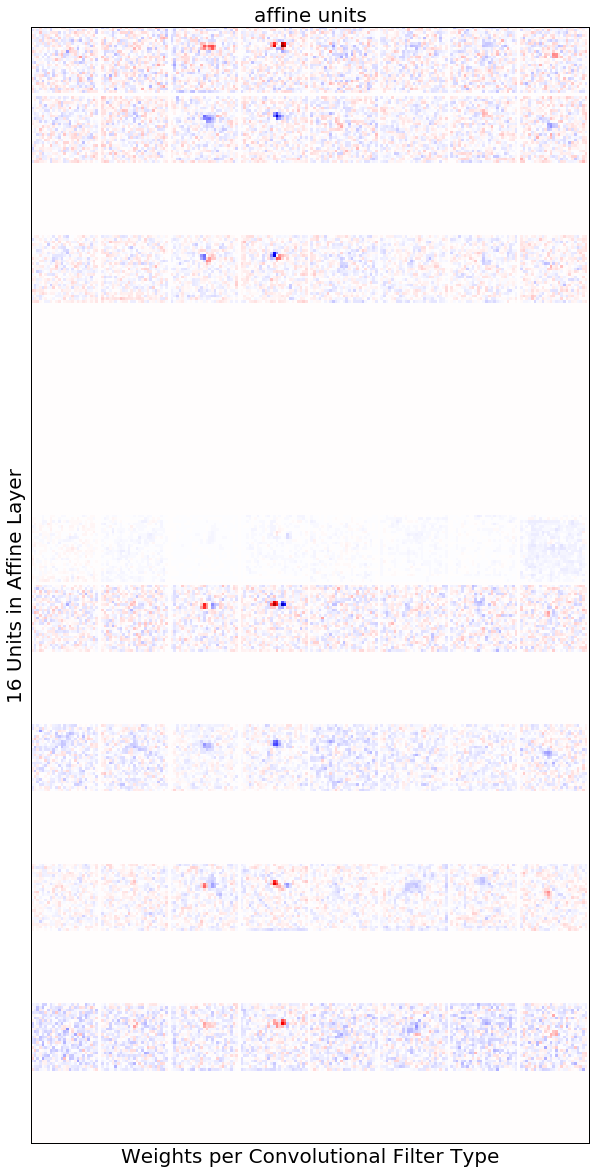

In [12]:
viz.visualize_affine_weights(natural_model_path + natural_weight_name, 8, fig_size=(20,20), layer_name='layer_4')

### STAs of affine inter-units

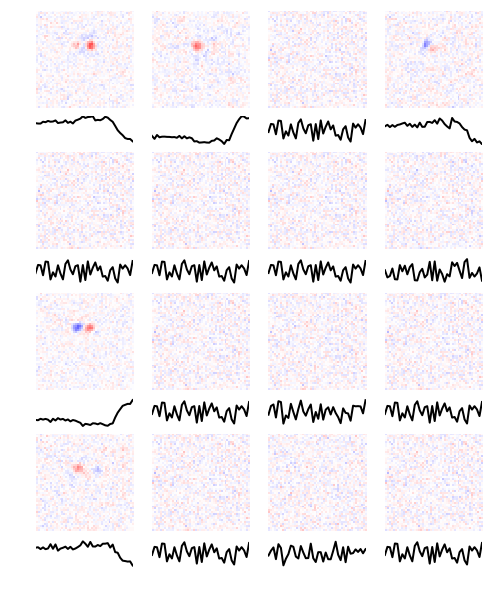

In [19]:
natural_stas = viz.get_sta(natural_multimodel, 4)
viz.visualize_sta(natural_stas)

#### Without normalization?

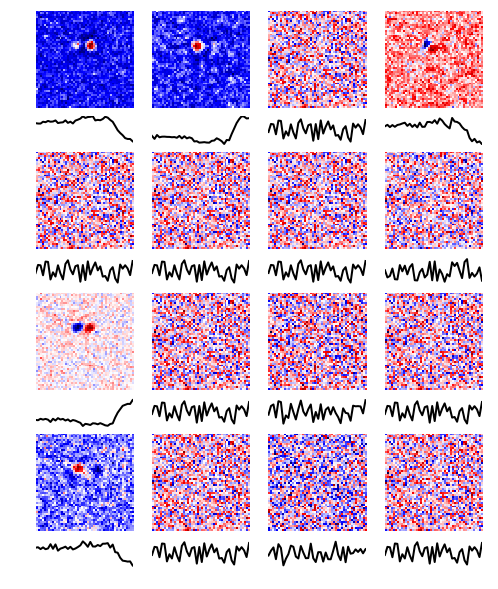

In [21]:
viz.visualize_sta(natural_stas, normalize=False)

## You can also load partial models (like the model up to the conv output, for instance)

In [13]:
partial_fn = load_partial_model(natural_multimodel, 0)

In [14]:
sample_response = partial_fn(np.random.randn(2,40,50,50).astype('float32'))

In [15]:
sample_response.shape

(2, 8, 50, 50)